# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries
import pandas as pd

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv", index_col=0)
south_df = pd.read_csv("SouthCallCenter.csv", index_col=0)

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [2]:
# Put your EDA code here
north_df.info()
north_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 245 non-null    object 
 1   Call Purpose           245 non-null    object 
 2   Time Block             245 non-null    object 
 3   Incoming or Outgoing   245 non-null    object 
 4   Queue                  245 non-null    object 
 5   Rep ID                 245 non-null    object 
 6   Sale                   245 non-null    object 
 7   Lost Call              245 non-null    int64  
 8   Abandoned              245 non-null    int64  
 9   Busy Minutes           245 non-null    int64  
 10  Not Ready Minutes      245 non-null    int64  
 11  Incoming Wait Time     82 non-null     float64
 12  During Call Wait Time  245 non-null    int64  
 13  Calls                  245 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 28.7+ KB


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
for col in north_df.columns:
    print(north_df[col].value_counts())
    print(north_df[col].describe())
    print()

North    245
Name: Branch, dtype: int64
count       245
unique        1
top       North
freq        245
Name: Branch, dtype: object

Product Support    145
Sales Support       85
Complaint           15
Name: Call Purpose, dtype: int64
count                 245
unique                  3
top       Product Support
freq                  145
Name: Call Purpose, dtype: object

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64
count          245
unique           9
top       12:00 PM
freq            45
Name: Time Block, dtype: object

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64
count          245
unique           2
top       Outgoing
freq           163
Name: Incoming or Outgoing, dtype: object

B    149
A     96
Name: Queue, dtype: int64
count     245
unique      2
top         B
freq      149
Name: Queue, dtype: object

Brent     37
Lilly     30
Todd 

In [4]:
south_df.info()
south_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 314 non-null    object 
 1   Call Purpose           314 non-null    object 
 2   Time Block             314 non-null    object 
 3   Incoming or Outgoing   314 non-null    object 
 4   Queue                  314 non-null    object 
 5   Rep ID                 314 non-null    object 
 6   Sale                   314 non-null    object 
 7   Lost Call              314 non-null    int64  
 8   Abandoned              314 non-null    int64  
 9   Busy Minutes           314 non-null    int64  
 10  Not Ready Minutes      314 non-null    int64  
 11  Incoming Wait Time     126 non-null    float64
 12  During Call Wait Time  314 non-null    int64  
 13  Calls                  314 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 36.8+ KB


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [5]:
for col in south_df.columns:
    print(south_df[col].value_counts())
    print(south_df[col].describe())
    print()

South    314
Name: Branch, dtype: int64
count       314
unique        1
top       South
freq        314
Name: Branch, dtype: object

Product Support    165
Sales Support      113
Complaint           36
Name: Call Purpose, dtype: int64
count                 314
unique                  3
top       Product Support
freq                  165
Name: Call Purpose, dtype: object

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64
count          314
unique           9
top       12:00 PM
freq            75
Name: Time Block, dtype: object

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64
count          314
unique           2
top       Outgoing
freq           188
Name: Incoming or Outgoing, dtype: object

D    176
C    138
Name: Queue, dtype: int64
count     314
unique      2
top         D
freq      176
Name: Queue, dtype: object

Eric      35
Randy     33
Sandy

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
    
    **North Branch**
        9 - Num reps
    **South Branch**
        11 - Num reps
        
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
    
    **North Branch**
        9.987755 - Avg busy minutes
        1.914286 - Avg not ready minutes
        3.048780 - Avg incoming wait time
        2.967347 - Avg during call wait time
    **South Branch**
        10.05414 - Avg busy minutes
        1.910828 - Avg not ready minutes
        3.000000 - Avg incoming wait time
        3.076433 - Avg during call wait time

3. What is the number of calls taken for each time block?
    
    **North Branch**
        5 - Num calls taken for 9AM
        43 - Num calls taken for 10AM
        25 - Num calls taken for 11AM
        45 - Num calls taken for 12PM
        17 - Num calls taken for 1PM
        35 - Num calls taken for 2PM
        30 - Num calls taken for 3PM
        28 - Num calls taken for 4PM
        17 - Num calls taken for 5PM
    **South Branch**
        5 - Num calls taken for 9AM
        56 - Num calls taken for 10AM
        31 - Num calls taken for 11AM
        75 - Num calls taken for 12PM
        23 - Num calls taken for 1PM
        30 - Num calls taken for 2PM
        43 - Num calls taken for 3PM
        25 - Num calls taken for 4PM
        26 - Num calls taken for 5PM

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [6]:
# Clean your data here
# 1) outgoing calls have NaN incoming wait time
n_outgoing = north_df.loc[north_df['Incoming or Outgoing']=='Outgoing', :]
n_incoming_null = north_df.loc[north_df['Incoming Wait Time'].isnull(), :]
print(n_outgoing.equals(n_incoming_null))

s_outgoing = south_df.loc[south_df['Incoming or Outgoing']=='Outgoing', :]
s_incoming_null = south_df.loc[south_df['Incoming Wait Time'].isnull(), :]
print(s_outgoing.equals(s_incoming_null))

True
True


In [7]:
# 2) Fix issue with north Sale value
n_NO = north_df.loc[north_df['Sale']=='NO']

north_df['Sale'] = north_df['Sale'].apply(lambda x: 'NO' if x == 'NO' else 'YES')
print(north_df['Sale'].value_counts())
print()

north_fix = north_df.loc[north_df['Sale']!='YES']
print(n_NO.equals(north_fix))

NO     234
YES     11
Name: Sale, dtype: int64

True


In [8]:
# 3) checking for duplicates in datasets
print(north_df.loc[north_df.duplicated(),:])
print()
print(south_df.loc[south_df.duplicated(),:])

#north_df.loc[(north_df['Time Block']=='12:00 PM') & (north_df['Rep ID']=='Joe')]
#north_df.loc[(north_df['Time Block']=='10:00 AM') & (north_df['Rep ID']=='Amanda')]
south_df.loc[(south_df['Time Block']=='12:00 PM') & (south_df['Rep ID']=='Kate')]
#south_df.loc[(south_df['Time Block']=='11:00 AM') & (south_df['Rep ID']=='Sandy')]
#south_df.loc[(south_df['Time Block']=='12:00 PM') & (south_df['Rep ID']=='Randy')]

    Branch   Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  \
50   North  Sales Support   12:00 PM             Incoming     A     Joe   NO   
105  North  Sales Support   10:00 AM             Outgoing     A  Amanda   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
50           0          0            10                  1   
105          0          0            11                  2   

     Incoming Wait Time  During Call Wait Time  Calls  
50                  4.0                      3      1  
105                 NaN                      2      1  

    Branch   Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
58   South  Sales Support   12:00 PM             Incoming     D   Kate   NO   
170  South  Sales Support   11:00 AM             Outgoing     D  Randy   NO   
180  South  Sales Support   12:00 PM             Outgoing     C  Sandy   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
58           0          

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
38,South,Complaint,12:00 PM,Incoming,D,Kate,NO,0,0,10,1,2.0,2,1
57,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
58,South,Sales Support,12:00 PM,Incoming,D,Kate,NO,0,0,8,1,3.0,3,1
174,South,Sales Support,12:00 PM,Outgoing,D,Kate,NO,0,0,12,2,NaN,3,1
178,South,Sales Support,12:00 PM,Outgoing,D,Kate,NO,0,0,10,3,NaN,2,1
184,South,Sales Support,12:00 PM,Outgoing,D,Kate,NO,0,0,11,1,NaN,4,1
222,South,Product Support,12:00 PM,Outgoing,D,Kate,NO,0,0,9,3,NaN,2,1
238,South,Product Support,12:00 PM,Outgoing,D,Kate,NO,0,0,12,2,NaN,3,1
246,South,Product Support,12:00 PM,Outgoing,D,Kate,NO,0,0,8,3,NaN,4,1
249,South,Product Support,12:00 PM,Outgoing,D,Kate,NO,0,0,12,3,NaN,2,1


In [9]:
# 4) Column is not informative
north_drop_df = north_df.drop(columns=['Calls', 'Incoming or Outgoing'])
south_drop_df = south_df.drop(columns=['Calls', 'Incoming or Outgoing'])

#north_drop_df.head()
south_drop_df.head()

,Branch,Call Purpose,Time Block,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time
0,South,Sales Support,10:00 AM,D,Kate,NO,0,0,9,1,1.0,2
1,South,Sales Support,10:00 AM,C,Eric,NO,0,0,8,2,1.0,4
2,South,Sales Support,10:00 AM,C,Susan,NO,0,0,10,2,1.0,4
3,South,Sales Support,10:00 AM,C,Alice,NO,0,0,12,1,1.0,3
4,South,Sales Support,12:00 PM,C,Sandy,NO,0,0,8,3,1.0,3


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
    
    **Yes**
    
    
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

    **I used a function to iterate over the Sale feature and change every non-'NO' value to 'YES'. I made this correction because the two separate 'YES' values are a data entry error, and the values for the column should fall into one of two categories.**


3. Are there duplicates in the two data sets? If there are, how did you handle them?

    **Yes. I did not remove the duplicate observations or make any changes to them. I considered removing the duplicates IF I could make the judgement that the duplicate call could not have been handled by the Rep in the Time Block due to time constraints. However, the Reps handle many calls in the same Time Block that are not duplicates, so I concluded that the duplicate observations are actual call info that should be kept and not data entry mistakes.**


4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
    
    **Yes. The Calls feature is unnecessary because the value is 1 for all observations for both branches, which is not informative. The 'Incoming or Outgoing' feature is also redundant because you can determine incoming or outgoing from 'Incoming Wait Time' being not null or null, respectively. I dropped the columns from a copy of each DataFrame and saved the copy. I kept the original DataFrame variables as is, because having the redundant columns might be easier for answering the data manipulation questions.**

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [10]:
# combine the two datasets together
df = pd.concat([north_df, south_df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 559 non-null    object 
 1   Call Purpose           559 non-null    object 
 2   Time Block             559 non-null    object 
 3   Incoming or Outgoing   559 non-null    object 
 4   Queue                  559 non-null    object 
 5   Rep ID                 559 non-null    object 
 6   Sale                   559 non-null    object 
 7   Lost Call              559 non-null    int64  
 8   Abandoned              559 non-null    int64  
 9   Busy Minutes           559 non-null    int64  
 10  Not Ready Minutes      559 non-null    int64  
 11  Incoming Wait Time     208 non-null    float64
 12  During Call Wait Time  559 non-null    int64  
 13  Calls                  559 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 65.5+ KB


In [22]:
# Manipulate data here
# 1) Reps and num calls completed
branch_rep = df[['Branch', 'Rep ID']]
branch_rep = branch_rep.drop_duplicates()
print(branch_rep)

df1 = df.groupby('Rep ID').sum()
df1.sort_values(by=['Calls'], inplace=True, ascending=False)
print(df1.head())

left_merged = pd.merge(df1, branch_rep, how="left", on=['Rep ID'])
left_merged.head(10)

   Branch  Rep ID
0   North   Brent
1   North     Cam
2   North    Todd
5   North    Duke
6   North     Joe
7   North   Lilly
11  North  Amanda
17  North    Andy
27  North  Xander
0   South    Kate
1   South    Eric
2   South   Susan
3   South   Alice
4   South   Sandy
5   South    Karl
8   South   Randy
9   South  George
10  South   Helga
11  South    Josh
27  South  Sharon
        Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Rep ID                                                                      
Brent         4840          0          1           362                 71   
Eric          5039          0          0           361                 54   
Randy         4576          3          1           320                 66   
Sandy         4694          1          0           325                 60   
Helga         5236          0          2           292                 58   

        Incoming Wait Time  During Call Wait Time  Calls  
Rep ID                 

,Rep ID,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Branch
0,Brent,4840,0,1,362,71,17.0,117,37,North
1,Eric,5039,0,0,361,54,47.0,112,35,South
2,Randy,4576,3,1,320,66,47.0,98,33,South
3,Sandy,4694,1,0,325,60,34.0,100,32,South
4,Helga,5236,0,2,292,58,36.0,95,31,South
5,Lilly,3375,0,2,307,59,37.0,88,30,North
6,Todd,4252,1,0,296,58,21.0,97,29,North
7,Duke,2999,2,0,292,56,39.0,85,29,North
8,George,4620,0,0,298,53,41.0,87,29,South
9,Kate,4615,0,0,291,61,37.0,83,29,South


In [12]:
# 2) avg call abandonment rate for each branch and whole company, which is >2-5%
df2 = df[['Branch','Abandoned','Calls']]
df2_aband = df2.groupby('Branch')['Abandoned'].mean()*100

df2_total = df2.groupby('Abandoned').sum()
df2_total = df2_total.append(df2_total.sum(numeric_only=True), ignore_index=True)
df2_total['abandoned_prop'] = df2_total['Calls']/df2_total.iloc[2,0]*100

print(df2_aband)
print()
print(df2_total)
print()

Branch
North    2.857143
South    1.273885
Name: Abandoned, dtype: float64

   Calls  abandoned_prop
0    548         98.0322
1     11          1.9678
2    559        100.0000



In [13]:
#3) percentage of calls answered in <= 2 secs
df3 = df[['Branch','Incoming Wait Time', 'Calls']].dropna()

df3['ideal_time'] = df3['Incoming Wait Time'].apply(lambda x: 0 if x > 2.0 else 1)

df3_ideal = df3.drop(columns=['Incoming Wait Time'])
df3_ideal = df3_ideal.groupby('Branch')['ideal_time'].mean()*100

df3_total = df3.drop(columns=['Incoming Wait Time']).groupby('ideal_time').sum()
df3_total = df3_total.append(df3_total.sum(numeric_only=True), ignore_index=True)
df3_total['ideal_time'] = df3_total['Calls']/df3_total.iloc[2,0]*100

print(df3_ideal)
print()
print(df3_total)

Branch
North    40.243902
South    38.095238
Name: ideal_time, dtype: float64

   Calls  ideal_time
0    127   61.057692
1     81   38.942308
2    208  100.000000


In [14]:
#4) average speed of answer during call wait
df4 = df[['Branch','During Call Wait Time','Calls']]

df4_speed = df4.groupby(['Branch','During Call Wait Time']).sum().reset_index()
df4_speed['total_wait'] = df4_speed['During Call Wait Time'] * df4_speed['Calls']

df4_total = df4.groupby('During Call Wait Time').sum().reset_index()
df4_total['total_wait'] = df4_total['During Call Wait Time'] * df4_total['Calls']
df4_total = df4_total.append(df4_total.sum(numeric_only=True), ignore_index=True)
df4_total['avg_ans_speed'] = df4_total['total_wait']/df4_total.iloc[3,1]

df4_north = df4_speed[:3]
df4_north = df4_north.append(df4_north.sum(numeric_only=True), ignore_index=True)
df4_north['avg_ans_speed'] = df4_north['total_wait']/df4_north.iloc[3,2]

df4_south = df4_speed[3:6]
df4_south = df4_south.append(df4_south.sum(numeric_only=True), ignore_index=True)
df4_south['avg_ans_speed'] = df4_south['total_wait']/df4_south.iloc[3,2]

print(df4_north)
print()
print(df4_south)
print()
print(df4_total)

  Branch  During Call Wait Time  Calls  total_wait  avg_ans_speed
0  North                    2.0   91.0       182.0       0.742857
1  North                    3.0   71.0       213.0       0.869388
2  North                    4.0   83.0       332.0       1.355102
3    NaN                    9.0  245.0       727.0       2.967347

  Branch  During Call Wait Time  Calls  total_wait  avg_ans_speed
0  South                    2.0   94.0       188.0       0.598726
1  South                    3.0  102.0       306.0       0.974522
2  South                    4.0  118.0       472.0       1.503185
3    NaN                    9.0  314.0       966.0       3.076433

   During Call Wait Time  Calls  total_wait  avg_ans_speed
0                      2    185         370       0.661896
1                      3    173         519       0.928444
2                      4    201         804       1.438283
3                      9    559        1693       3.028623


### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

    **North Branch**
        Brett - Rep with highest num calls
    **South Branch**
        Eric - Rep with highest num calls
        
        
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
    
    **North Branch**
        2.857143% - Calls abandoned
    **South Branch**
        1.273885% - Calls abandoned
    **Whole Company**
        1.9678% - Calls abandoned
        
    **None of these fall out of the optimal range of 2-5%**
    

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
    
    **North Branch**
        40.243902% - percentage of calls answered in <= 2 secs
    **South Branch**
        38.095238% - percentage of calls answered in <= 2 secs
    **Whole Company**
        38.942308% - percentage of calls answered in <= 2 secs


4. For each branch and the entire company, what is the average speed of answer?

    **North Branch**
        2.967347 - average speed of answer
    **South Branch**
        3.076433 - average speed of answer
    **Whole Company**
        3.028623 - average speed of answer

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

north = pd.read_csv("NorthCallCenter.csv")
south = pd.read_csv("SouthCallCenter.csv")
df = pd.concat([north, south])

In [16]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

[Text(0.5, 0, 'Queues'),
 Text(0, 0.5, '% Calls Abandoned'),
 Text(0.5, 1.0, 'Avg abandonment rate per queue')]

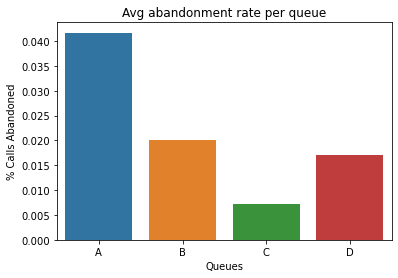

In [17]:
# VISUALIZATION 1 - BAR CHART
# What is the average abandonment rate per queue?
fig1 = sns.barplot(x=list(abandonment_rates.keys()),y=list(abandonment_rates.values()))
fig1.set(xlabel='Queues', ylabel='% Calls Abandoned', title = "Avg abandonment rate per queue")

In [18]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
print(north_plt)
print()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
print(service_level)
print()

left_merged = pd.merge(service_level, north_plt, how="left", on=['Rep ID'])
print(left_merged)

   Rep ID  Incoming Wait Time
0  Amanda            2.400000
1    Andy            3.600000
2   Brent            2.125000
3     Cam            2.909091
4    Duke            2.785714
5     Joe            3.600000
6   Lilly            3.083333
7    Todd            3.500000
8  Xander            3.333333

        Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5        60.000000
Andy          3       10        30.000000
Brent         6        8        75.000000
Cam           5       11        45.454545
Duke          6       14        42.857143
Joe           2       10        20.000000
Lilly         4       12        33.333333
Todd          2        6        33.333333
Xander        2        6        33.333333

   Rep ID  Calls_x  Calls_y  Service Level %  Incoming Wait Time
0  Amanda        3        5        60.000000            2.400000
1    Andy        3       10        30.000000            3.600000
2   Brent        6        8        75.000

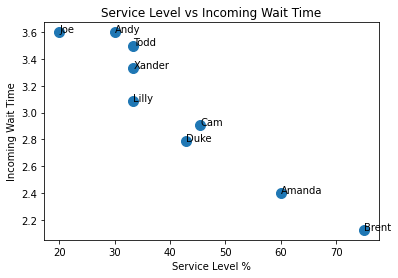

In [19]:
#VISUALIZATION 2 - SCATTER PLOT
# What is the service level and average speed of answer per each rep?

plt.scatter(left_merged["Service Level %"], left_merged["Incoming Wait Time"], s=100)

plt.title('Service Level vs Incoming Wait Time')
plt.xlabel("Service Level %")

plt.ylabel("Incoming Wait Time")

annotations = list(left_merged['Rep ID'])

# add text label to near each point on plot
for i, label in enumerate(annotations):
    plt.annotate(label, (left_merged["Service Level %"][i], left_merged["Incoming Wait Time"][i]))


In [20]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
complaints['Outgoing'] = 0

sales_support = purpose_counts["Sales Support"].to_dict()

product_support = purpose_counts["Product Support"].to_dict()

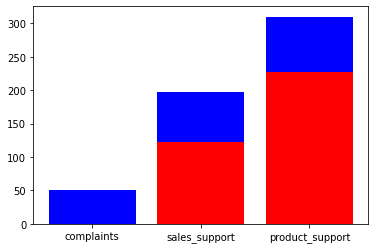

In [21]:
#VISUALIZAITON 3 - STACKED BAR PLOT
# For each type of call purpose, how many calls are outgoing vs. incoming?

# create data
x = ['complaints', 'sales_support', 'product_support']
y1 = [complaints['Outgoing'], sales_support['Outgoing'], product_support['Outgoing']]
y2 = [complaints['Incoming'], sales_support['Incoming'], product_support['Incoming']]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

I chose a bar plot for visualizaiton 1 because the difference between the % calls abandoned in each queue could be shown easily side by side.

I chose a scatter plot for visualizaiton 2 because I wanted to show the correlation between reps that had the greatest service level and reps that had the lowest incoming wait time. From the plot, you can clearly see that service level is higher when the reps respond faster. I can also see where most of the reps are grouped in terms of service level and incoming wait time. More than half the reps for the north call center have <50% service level.

I chose a stacked bar plot for visualization 3 because I wanted to show the proportion of outgoing to incoming calls for each type of call purpose. The plot allows you to see the makeup of outgoing vs incoming as well as compare the proportions across the different call purposes.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

The South brach is operating more efficiently. The north branch and south branch have similar service level and speed of answer (with north branch being better at both), but the south branch has less than half the avg abandonment rate. The north branch is answering calls quickly, but missing calls due to the wait time  before their representatives pick up a call.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

The north brach would benefit from the extra help so that that reduce the number of abandoned calls. The north branch also has fewer reps than the south branch currently.

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

I wish there was more detailed information about how the block of time during which the call is taken and how the wait time happens chronologically in that block of time. I could not tell if the duplicate observations were actual calls or if the combination of all the features is not necessarily unique.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
